<a href="https://colab.research.google.com/github/ecturgut/pytorch_Example/blob/main/pyTorch_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torchvision import models

1.12.1+cu113
False


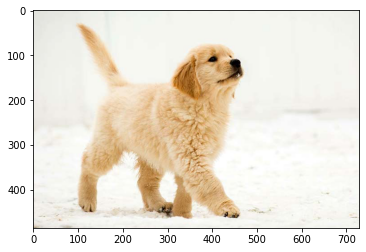

In [ ]:
print(torch.__version__)
print(torch.cuda.is_available())

url="https://www.akc.org/wp-content/uploads/2017/11/Golden-Retriever-Puppy.jpg"
file_name="dog.jpg"
urllib.request.urlretrieve(url,file_name)

img=Image.open("dog.jpg")
plt.imshow(img)

In [ ]:
preprocess = transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(
                        mean = [0.485, 0.456, 0.406],
                        std = [0.229, 0.224, 0.225]
                    )

])


img_tensor = preprocess(img)
img_tensor.shape


batch = img_tensor.unsqueeze(0)
batch.shape

models = models.alexnet(pretrained = True )
device ="cuda" if torch.cuda.is_available() else "cpu"
models.eval()
models.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
y = models(batch.to(device))
y.shape
y_max, index = torch.max(y,1)
print(index, y_max)

url = "http://pytorch.tips/imagenet-labels"
fname = "imagenet_class_labels.txt"
urllib.request.urlretrieve(url, fname)

with open("imagenet_class_labels.txt") as f:
  classes = [line.strip() for line in f.readlines()]

tensor([207]) tensor([13.0306], grad_fn=<MaxBackward0>)


In [ ]:
print(classes[207])

prob  = torch.nn.functional.softmax(y, dim=1)[0]*100

print(classes[index[0]],
    prob[index[0]].item())

207: 'golden retriever',
207: 'golden retriever', 58.179100036621094


In [ ]:
_, indeces = torch.sort(y, descending=True)

for idx in indeces[0][:5]:
  print(classes[idx], prob[idx].item())

207: 'golden retriever', 58.179100036621094
260: 'chow, chow chow', 5.273745059967041
208: 'Labrador retriever', 5.254908084869385
266: 'miniature poodle', 4.850017547607422
185: 'Norfolk terrier', 2.7688515186309814
